# Working with Python, DataFrames

This kernel aims to 
* shows template of usually needed forms of using
* compares sql and python language
* to be draft for implement easily another project

SQL images could considered pseudo code.

### Outline
* [import libraries](#import_libraries)
* [import datasets](#import_datasets)
* [dataset overview](#dataset_overview)
    * head
    * shape, # of row and column
    * type of vars
    * summary statistic 
        * mean, std, median, quartile for numeric vars
        * count, top, unique, freq for categoric vars
    * unique vars
    * value count
* [rename column names](#rename_column_names)
* [index](#arrange_index)
* ### Basic SQL vs Dataframe
    * [select](#select)
    * [select distinct, duplicated data](#select_distinct_duplicated_data)
    * [adding a new column](#adding_a_new_column)
    * [where](#where)
        * [and](#and)
        * [or](#or)
        * [group filter](#group_filter)
        * [function in filter](#function_filter)
        * [subquery in filter](#filter_in_subquery)
    * [sorting](#sorting)
    * [aggregate](#aggregate)
    * [join](#join)
        * [left join](#left_join)
        * [inner join](#inner_join)
        * [append](#append)

<a id='import_libraries'></a>

## import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings = pd.read_csv("00_datasets/IMDb ratings.csv")
ratings.shape

(85855, 49)

In [3]:
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


<a id='import_datasets'></a>

## import datasets

In [4]:
# https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+title_principals.csv

movies = pd.read_csv("00_datasets/IMDb movies.csv")
movies = movies.sample(frac=0.1, random_state=1)

# names = pd.read_csv("00_datasets/IMDb names.csv")
# names = names.sample(frac=0.05, random_state=1)

ratings = pd.read_csv("00_datasets/IMDb ratings.csv")
ratings = ratings.sample(frac=0.01, random_state=1)

# title_principals = pd.read_csv("00_datasets/IMDb title_principals.csv")
# title_principals = title_principals.sample(frac=0.05, random_state=1)

<a id='dataset_overview'></a>

## dataset overview

In [4]:
movies.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
4683,tt0036711,Vacanze a Natale,Christmas Holiday,1944,1944-07-31,"Crime, Drama, Film-Noir",93,USA,English,Robert Siodmak,...,"Deanna Durbin, Gene Kelly, Richard Whorf, Dean...",A young femme fatale-type woman realizes that ...,6.6,1162,NaN,NaN,NaN,NaN,39.0,20.0
28176,tt0110216,Junior,Junior,1994,1994-12-22,"Comedy, Romance, Sci-Fi",109,USA,English,Ivan Reitman,...,"Arnold Schwarzenegger, Danny DeVito, Emma Thom...","As part of a fertility research project, a mal...",4.6,63996,$ 60000000,$ 36763355,$ 108431355,59.0,90.0,43.0
16686,tt0071914,Nitten røde roser,Nitten røde roser,1974,1974-08-16,Crime,99,Denmark,Danish,Esben Høilund Carlsen,...,"Henning Jensen, Poul Reichhardt, Jens Okking, ...",A Danish man's girlfriend is killed by a drunk...,6.4,178,DKK 1400000,NaN,NaN,NaN,2.0,2.0


In [97]:
movies.shape

(8586, 21)

In [8]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [79]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8586 entries, 4683 to 16399
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          8586 non-null   object 
 1   title                  8586 non-null   object 
 2   original_title         8586 non-null   object 
 3   year                   8586 non-null   object 
 4   date_published         8586 non-null   object 
 5   genre                  8586 non-null   object 
 6   duration               8586 non-null   int64  
 7   country                8579 non-null   object 
 8   language               8499 non-null   object 
 9   director               8576 non-null   object 
 10  writer                 8401 non-null   object 
 11  production_company     8163 non-null   object 
 12  actors                 8577 non-null   object 
 13  description            8405 non-null   object 
 14  avg_vote               8586 non-null   float64
 15  

In [80]:
movies.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

### only numeric vars

In [20]:
movies.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,8586.000000,8586.000000,8.586000e+03,1302.000000,7855.000000,7470.000000
mean,100.127300,5.882192,9.490378e+03,55.596774,46.847231,27.356091
std,21.716112,1.237718,5.529862e+04,18.361083,176.211287,57.175794
min,45.000000,1.000000,9.900000e+01,3.000000,1.000000,1.000000
25%,88.000000,5.200000,2.040000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.780000e+02,57.000000,10.000000,8.000000
75%,108.000000,6.800000,1.806000e+03,68.000000,27.000000,23.000000
max,357.000000,9.700000,1.807440e+06,100.000000,5261.000000,838.000000


### for categoric vars

In [69]:
movies.genre.describe().to_frame()

,genre
count,8586
unique,589
top,Drama
freq,1277


In [5]:
columns_name = movies.columns
catvars_summary = pd.DataFrame()
for i in columns_name:
    if movies[i].dtypes == object:
        catvars_summary = pd.concat([catvars_summary, movies[i].describe().to_frame()],axis=1)
catvars_summary = catvars_summary.T
catvars_summary

,count,unique,top,freq
imdb_title_id,8586,8586,tt1500703,1
title,8586,8547,Amleto,4
original_title,8586,8536,Hamlet,4
year,8586,139,2018,317
date_published,8586,5983,2017,16
genre,8586,589,Drama,1277
country,8579,899,USA,2851
language,8499,816,English,3656
director,8576,6710,Gordon Douglas,11
writer,8401,8046,Lakis Mihailidis,7


<div>
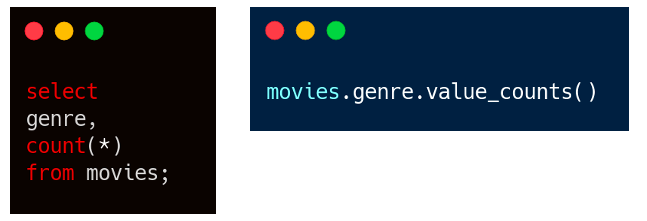
</div>

In [96]:
movies.genre.value_counts().to_frame()
# alternative
# movies.groupby("genre").count()[["imdb_title_id"]].sort_values(by="imdb_title_id", ascending=False)

,genre
Drama,1277
Comedy,781
"Comedy, Drama",372
"Drama, Romance",333
Horror,244
...,...
"Adventure, Mystery, Romance",1
"Comedy, War, Drama",1
"Drama, Romance, Music",1
"Comedy, Crime, Sport",1


In [74]:
movies.genre.unique()

array(['Crime, Drama, Film-Noir', 'Comedy, Romance, Sci-Fi', 'Crime',
       'Comedy', 'Action, Horror', 'Comedy, Romance', 'Comedy, Drama',
       'Thriller, Drama', 'Crime, Drama', 'Drama', 'Drama, Mystery',
       'Drama, Horror', 'Drama, Romance', 'Animation, Action, Adventure',
       'Action, Horror, Sci-Fi', 'Adventure, Family, Fantasy',
       'Action, Drama, Musical', 'Action, Horror, Mystery',
       'Adventure, Family', 'Comedy, War', 'Comedy, Horror, Mystery',
       'Family', 'Comedy, Fantasy, Romance', 'Adventure, Sci-Fi',
       'Horror, Mystery', 'Comedy, Crime, Mystery', 'Adventure, Comedy',
       'Action, Comedy', 'Drama, War', 'Horror', 'Crime, Drama, Romance',
       'Action, Adventure, Comedy', 'Action, Thriller', 'Drama, Fantasy',
       'Fantasy, Horror, Sci-Fi', 'Mystery', 'Action, Comedy, Thriller',
       'Biography, Drama, History', 'Comedy, Crime, Romance',
       'Adventure, Thriller, Western', 'Drama, Mystery, Thriller',
       'Action, Comedy, Crime', 'A

In [72]:
movies.genre.nunique()

589

<a id='rename_column_names'></a>

## rename column names

In [104]:
# if there is a blank space in column name
movies.columns = [i.replace(" ","_") if len(i.split()) > 1 else i for i in movies.columns]

# cleaning strip in column name and transform lower case
movies.columns = [i.strip().lower() for i in movies.columns]

<a id='arrange_index'></a>

## arrange index

In [126]:
movies_copy = movies.copy()

In [127]:
# index name
print(movies_copy.index.name)
movies_copy.index

None


Int64Index([ 4683, 28176, 16686, 76981, 79161, 40856, 76774, 21262, 39409,
            77595,
            ...
            80203, 16218,  7601, 68123,    38, 17331, 84400, 60875, 34080,
            16399],
           dtype='int64', length=8586)

In [145]:
# check if index is unique
movies_copy.index.is_unique

True

In [128]:
# rename of index
movies_copy.index.name = "index_no"
movies_copy.index

Int64Index([ 4683, 28176, 16686, 76981, 79161, 40856, 76774, 21262, 39409,
            77595,
            ...
            80203, 16218,  7601, 68123,    38, 17331, 84400, 60875, 34080,
            16399],
           dtype='int64', name='index_no', length=8586)

In [129]:
# change index (new var)
movies_copy.index = range(1, movies_copy.shape[0]+1)
movies_copy.index

RangeIndex(start=1, stop=8587, step=1)

In [130]:
# change index ("imdb_title_id" was a column)
movies_copy = movies_copy.set_index("imdb_title_id")
movies_copy.index

Index(['tt0036711', 'tt0110216', 'tt0071914', 'tt5178660', 'tt5946668',
       'tt0295634', 'tt5111382', 'tt0086852', 'tt0271607', 'tt5373588',
       ...
       'tt6281320', 'tt0070586', 'tt0045875', 'tt2630310', 'tt0004681',
       'tt0074157', 'tt8535968', 'tt1687889', 'tt0166803', 'tt0071145'],
      dtype='object', name='imdb_title_id', length=8586)

In [137]:
# creating multi-index
movies_copy = movies.copy()
movies_copy = movies_copy.set_index(["imdb_title_id", "title"])
movies_copy.index

MultiIndex([('tt0036711',                           'Vacanze a Natale'),
            ('tt0110216',                                     'Junior'),
            ('tt0071914',                          'Nitten røde roser'),
            ('tt5178660',                         'Rosso Mille Miglia'),
            ('tt5946668',                              '4/20 Massacre'),
            ('tt0295634',                              'Stereo Future'),
            ('tt5111382',                              'Palabi Kothae'),
            ('tt0086852',                               'Conto finale'),
            ('tt0271607',                                  'Kuttettan'),
            ('tt5373588',                   'Y a Dios que me perdone!'),
            ...
            ('tt6281320',                        'Conditional Release'),
            ('tt0070586',                'R.A.S. - Nulla da segnalare'),
            ('tt0045875',                                  'Hiroshima'),
            ('tt2630310',          

In [138]:
movies_copy.head(2)

,,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,title,,,,,,,,,,,,,,,,,,,,
tt0036711,Vacanze a Natale,Christmas Holiday,1944,1944-07-31,"Crime, Drama, Film-Noir",93,USA,English,Robert Siodmak,"W. Somerset Maugham, Herman J. Mankiewicz",Universal Pictures,"Deanna Durbin, Gene Kelly, Richard Whorf, Dean...",A young femme fatale-type woman realizes that ...,6.6,1162,NaN,NaN,NaN,NaN,39.0,20.0
tt0110216,Junior,Junior,1994,1994-12-22,"Comedy, Romance, Sci-Fi",109,USA,English,Ivan Reitman,"Kevin Wade, Chris Conrad",Universal Pictures,"Arnold Schwarzenegger, Danny DeVito, Emma Thom...","As part of a fertility research project, a mal...",4.6,63996,$ 60000000,$ 36763355,$ 108431355,59.0,90.0,43.0


In [140]:
# transform to single-index from multi-index
# level=[0] ==> remove 'imdb_title_id' from index and 'imdb_title_id' is a column now
# level=[1] ==> remove 'title' index and 'title' is a column now
movies_copy.reset_index(level=[1], inplace=True)
movies_copy.index

Index(['tt0036711', 'tt0110216', 'tt0071914', 'tt5178660', 'tt5946668',
       'tt0295634', 'tt5111382', 'tt0086852', 'tt0271607', 'tt5373588',
       ...
       'tt6281320', 'tt0070586', 'tt0045875', 'tt2630310', 'tt0004681',
       'tt0074157', 'tt8535968', 'tt1687889', 'tt0166803', 'tt0071145'],
      dtype='object', name='imdb_title_id', length=8586)

In [141]:
movies_copy.head(2)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0036711,Vacanze a Natale,Christmas Holiday,1944,1944-07-31,"Crime, Drama, Film-Noir",93,USA,English,Robert Siodmak,"W. Somerset Maugham, Herman J. Mankiewicz",...,"Deanna Durbin, Gene Kelly, Richard Whorf, Dean...",A young femme fatale-type woman realizes that ...,6.6,1162,NaN,NaN,NaN,NaN,39.0,20.0
tt0110216,Junior,Junior,1994,1994-12-22,"Comedy, Romance, Sci-Fi",109,USA,English,Ivan Reitman,"Kevin Wade, Chris Conrad",...,"Arnold Schwarzenegger, Danny DeVito, Emma Thom...","As part of a fertility research project, a mal...",4.6,63996,$ 60000000,$ 36763355,$ 108431355,59.0,90.0,43.0


In [142]:
# reset index
movies_copy.reset_index(inplace=True) # the current index has been converted to a column
movies_copy.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0036711,Vacanze a Natale,Christmas Holiday,1944,1944-07-31,"Crime, Drama, Film-Noir",93,USA,English,Robert Siodmak,...,"Deanna Durbin, Gene Kelly, Richard Whorf, Dean...",A young femme fatale-type woman realizes that ...,6.6,1162,NaN,NaN,NaN,NaN,39.0,20.0
1,tt0110216,Junior,Junior,1994,1994-12-22,"Comedy, Romance, Sci-Fi",109,USA,English,Ivan Reitman,...,"Arnold Schwarzenegger, Danny DeVito, Emma Thom...","As part of a fertility research project, a mal...",4.6,63996,$ 60000000,$ 36763355,$ 108431355,59.0,90.0,43.0


## select

<div>
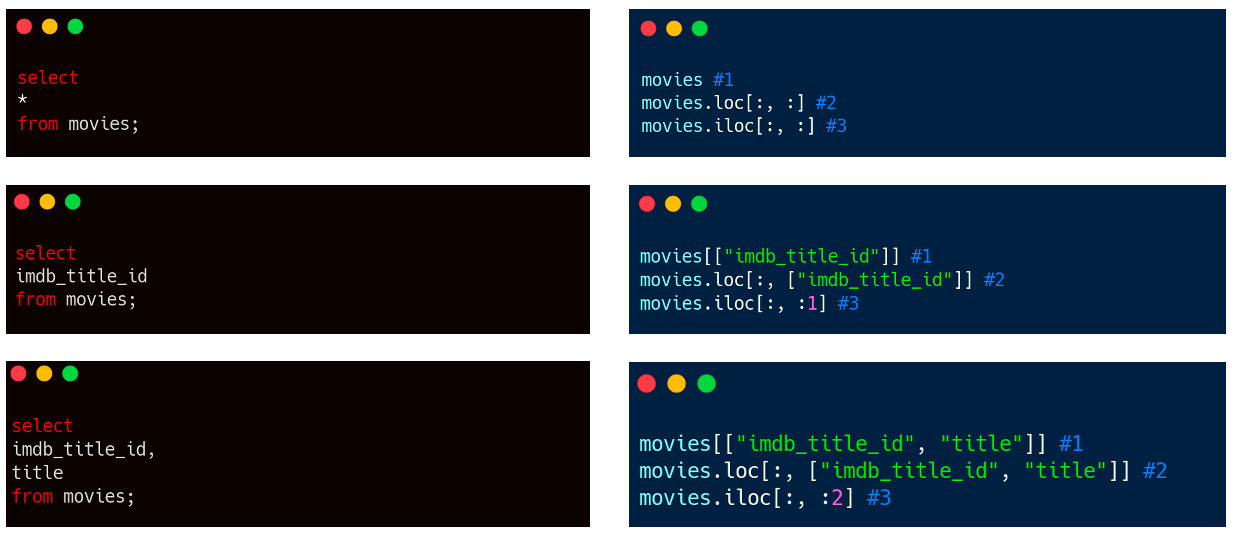
</div>

In [27]:
movies[["imdb_title_id", "title"]]
# movies.loc[:, ["imdb_title_id", "title"]]
# movies.iloc[:, :2]

,imdb_title_id,title
4683,tt0036711,Vacanze a Natale
28176,tt0110216,Junior
16686,tt0071914,Nitten røde roser
76981,tt5178660,Rosso Mille Miglia
79161,tt5946668,4/20 Massacre
...,...,...
17331,tt0074157,Centro della Terra: continente sconosciuto
84400,tt8535968,Systemsprenger
60875,tt1687889,Madison County
34080,tt0166803,Siete mil días juntos


<a id='select_distinct_duplicated_data'></a>

## select distinct, duplicated data

In [65]:
movies.nunique().to_frame()

,0
imdb_title_id,8586
title,8547
original_title,8536
year,139
date_published,5983
genre,589
duration,168
country,899
language,816
director,6710


In [66]:
movies[["imdb_title_id", "title", "original_title"]].nunique().to_frame()

,0
imdb_title_id,8586
title,8547
original_title,8536


<div>
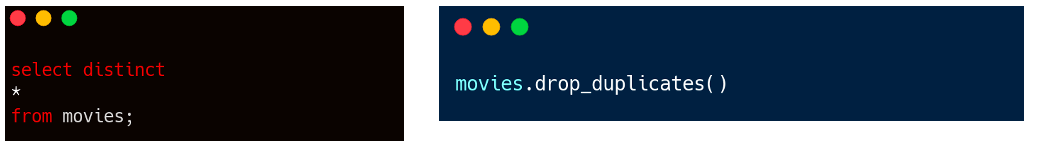
</div>

In [5]:
movies.drop_duplicates()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
4683,tt0036711,Vacanze a Natale,Christmas Holiday,1944,1944-07-31,"Crime, Drama, Film-Noir",93,USA,English,Robert Siodmak,...,"Deanna Durbin, Gene Kelly, Richard Whorf, Dean...",A young femme fatale-type woman realizes that ...,6.6,1162,NaN,NaN,NaN,NaN,39.0,20.0
28176,tt0110216,Junior,Junior,1994,1994-12-22,"Comedy, Romance, Sci-Fi",109,USA,English,Ivan Reitman,...,"Arnold Schwarzenegger, Danny DeVito, Emma Thom...","As part of a fertility research project, a mal...",4.6,63996,$ 60000000,$ 36763355,$ 108431355,59.0,90.0,43.0
16686,tt0071914,Nitten røde roser,Nitten røde roser,1974,1974-08-16,Crime,99,Denmark,Danish,Esben Høilund Carlsen,...,"Henning Jensen, Poul Reichhardt, Jens Okking, ...",A Danish man's girlfriend is killed by a drunk...,6.4,178,DKK 1400000,NaN,NaN,NaN,2.0,2.0
76981,tt5178660,Rosso Mille Miglia,Rosso Mille Miglia,2015,2015-10-15,Comedy,94,Italy,Italian,Claudio Uberti,...,"Lyudmila Bikmullina, Maurizio Francone, Remo G...",NaN,4.7,109,NaN,NaN,$ 2400,NaN,2.0,NaN
79161,tt5946668,4/20 Massacre,4/20 Massacre,2018,2018-04-03,"Action, Horror",84,USA,NaN,Dylan Reynolds,...,"Jamie Bernadette, Vanessa Reynolds, Stacey Dan...",A group of five women go camping in the woods ...,3.7,558,NaN,NaN,NaN,NaN,22.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17331,tt0074157,Centro della Terra: continente sconosciuto,At the Earth's Core,1976,1976-07-01,"Adventure, Fantasy, Sci-Fi",89,"UK, USA",English,Kevin Connor,...,"Doug McClure, Peter Cushing, Caroline Munro, C...",A Victorian era scientist and his assistant ta...,5.1,4216,$ 1500000,NaN,NaN,NaN,71.0,64.0
84400,tt8535968,Systemsprenger,Systemsprenger,2019,2019-12-12,Drama,125,Germany,German,Nora Fingscheidt,...,"Helena Zengel, Albrecht Schuch, Gabriela Maria...","On her wild quest for love, 9-year-old Benni's...",7.8,7723,NaN,NaN,$ 546444,90.0,33.0,72.0
60875,tt1687889,Madison County,Madison County,2011,2011-10-17,"Horror, Mystery, Thriller",81,USA,English,Eric England,...,"Colley Bailey, Matt Mercer, Ace Marrero, Joann...","A group of college kids travel to a small, mou...",4.1,1731,$ 70000,NaN,NaN,NaN,44.0,36.0
34080,tt0166803,Siete mil días juntos,Siete mil días juntos,1994,1995-01-27,Comedy,100,Spain,Spanish,Fernando Fernán Gómez,...,"José Sacristán, María Barranco, Pilar Bardem, ...",NaN,6.5,115,NaN,NaN,NaN,NaN,NaN,NaN


<div>
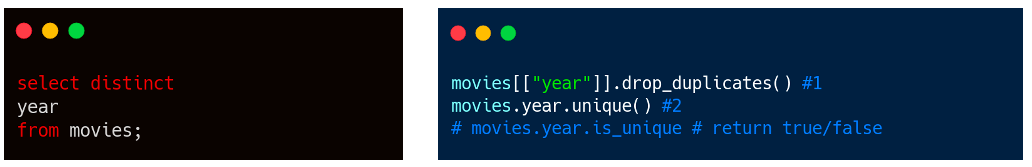
</div>

In [61]:
movies.year.is_unique

False

In [49]:
movies[["year"]].drop_duplicates()

,year
4683,1944
28176,1994
16686,1974
76981,2015
79161,2018
...,...
69080,2000
72826,1992
45,1915
66622,2010


In [41]:
movies.year.unique()

array([1944, 1994, 1974, '2015', '2018', 2001, '1997', 1984, 1990, '2017',
       2010, 2002, 1914, 1957, 1940, 2012, 1995, 1971, 2011, '2016', 1983,
       '2013', 2006, 1976, 2000, 2014, 1987, 2007, 1931, 1945, 1996, 1917,
       1950, 1997, 1967, 1979, 2008, '2014', 2003, 2015, 2013, 1947,
       '2012', 2004, 1969, 1981, 1968, 1973, 1993, 1972, 1985, 1949, 1937,
       1980, 1998, 2019, 1955, 1977, 1954, 1951, '2019', 1982, 1964, 1989,
       1943, 2009, 1952, 1988, 1961, 1930, 1965, 1975, 2005, 2020, 2017,
       1999, 1924, 1992, 1960, 1986, 1991, 1953, 1962, 1948, 1925, 1970,
       1978, 1932, '2020', 1933, 1958, 1959, 1929, 1941, 1966, 1928, 1956,
       1923, 1935, 1939, 1936, 1934, 2016, 2018, 1938, 1920, 1946, 1942,
       '1998', 1927, 1913, 1963, 1919, '1970', '2001', 1926, 1921, '1976',
       1911, '2011', '1996', '1930', 1916, '2005', '2006', '2007', '2002',
       1922, 'TV Movie 2019', '1999', '1994', '1993', 1918, '1984',
       '2000', '1992', 1915, '2010', '1995']

In [42]:
movies.year.nunique()

139

<div>
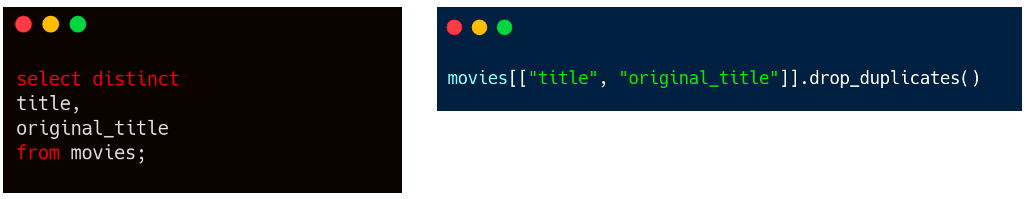
</div>

In [56]:
movies[["title", "original_title"]].drop_duplicates()

,title,original_title
4683,Vacanze a Natale,Christmas Holiday
28176,Junior,Junior
16686,Nitten røde roser,Nitten røde roser
76981,Rosso Mille Miglia,Rosso Mille Miglia
79161,4/20 Massacre,4/20 Massacre
...,...,...
17331,Centro della Terra: continente sconosciuto,At the Earth's Core
84400,Systemsprenger,Systemsprenger
60875,Madison County,Madison County
34080,Siete mil días juntos,Siete mil días juntos


In [86]:
# shows duplicated data (according to ["title", "original_title"])
# keep ==> 'first': show only first row, 'last': show only last row, 'False': show all rows

a = movies.sort_values(by=["title", "original_title"])
a[a.duplicated(subset=["title", "original_title"], keep=False)]
# a[a.duplicated(subset=["title", "original_title"], keep='first')]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
53363,tt1067106,A Christmas Carol,A Christmas Carol,2009,2009-12-03,"Animation, Drama, Family",96,USA,English,Robert Zemeckis,...,"Jim Carrey, Steve Valentine, Daryl Sabara, Sag...",An animated retelling of Charles Dickens' clas...,6.8,98606,$ 200000000,$ 137855863,$ 325286646,55.0,278.0,254.0
74536,tt4387314,A Christmas Carol,A Christmas Carol,2018,2018-12-16,Fantasy,75,USA,English,David Izatt,...,"Bonnie Wright, Rebecca Hanssen, Stuart Brennan...",A contemporary retelling of the timeless Dicke...,3.8,110,NaN,NaN,NaN,NaN,7.0,NaN
74423,tt4338434,A Month of Sundays,A Month of Sundays,2015,2016-07-14,"Comedy, Drama",105,Australia,English,Matthew Saville,...,"Anthony LaPaglia, Julia Blake, Justine Clarke,...","Miserable real estate agent Frank, whose busin...",6.0,350,NaN,NaN,$ 654116,NaN,8.0,19.0
39626,tt0275527,A Month of Sundays,A Month of Sundays,2001,2001-09-17,Drama,92,USA,English,Stewart Raffill,...,"Rod Steiger, Sally Kirkland, Michael Paré, Dee...",The story of a teenage girl who kidnaps her gr...,5.9,129,NaN,NaN,NaN,NaN,9.0,NaN
13998,tt0064400,Amleto,Hamlet,1969,1970-04-09,Drama,117,UK,English,Tony Richardson,...,"Nicol Williamson, Judy Parfitt, Anthony Hopkin...",Nicol Williamson takes the lead role in this s...,6.9,708,NaN,NaN,NaN,NaN,24.0,9.0
25313,tt0099726,Amleto,Hamlet,1990,1991-01-18,Drama,135,"USA, UK, France",English,Franco Zeffirelli,...,"Mel Gibson, Glenn Close, Alan Bates, Paul Scof...","Hamlet, Prince of Denmark, finds out that his ...",6.7,21019,NaN,$ 20710451,$ 20710451,53.0,100.0,38.0
246,tt0012249,Amleto,Hamlet,1921,1921-01-27,Drama,131,Germany,German,"Svend Gade, Heinz Schall",...,"Asta Nielsen, Paul Conradi, Mathilde Brandt, E...",Danish silent movie-star Asta Nielsen formed h...,7.0,382,NaN,NaN,NaN,NaN,5.0,8.0
57739,tt1403047,Aurora,Aurora,2010,2011-03-11,Drama,181,"Romania, France, Switzerland, Germany",Romanian,Cristi Puiu,...,"Cristi Puiu, Clara Voda, Valeria Seciu, Catrin...",Viorel a 42 year old man troubled by obscure t...,6.6,1632,NaN,$ 5677,$ 31720,63.0,8.0,76.0
31939,tt0128059,Aurora,Aurora,1998,1998-05-25,"Adventure, Sci-Fi",87,USA,English,Christopher Kulikowski,...,"Christopher Stapleton, Michael Otis, David Jea...","In the 22nd century, seven explorers set out o...",3.5,192,$ 90000,NaN,NaN,NaN,23.0,NaN
6743,tt0043307,Baazi,Baazi,1951,1951,"Crime, Drama, Musical",143,India,Hindi,Guru Dutt,...,"Dev Anand, Geeta Bali, Kalpana Kartik, Roopa V...",An ace gambler is forced to join a gambling sy...,7.3,304,NaN,NaN,NaN,NaN,4.0,1.0


<a id='adding_a_new_column'></a>

## adding a new column

<div>
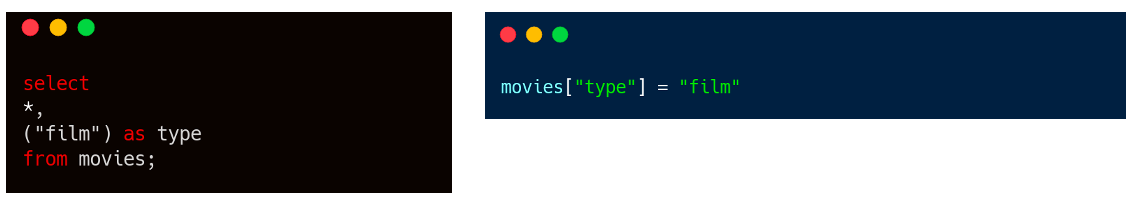
</div>

In [118]:
movies_copy = movies.copy()
movies_copy["type"] = "film"
movies_copy[["type"]].drop_duplicates() # check

,type
4683,film


<div>
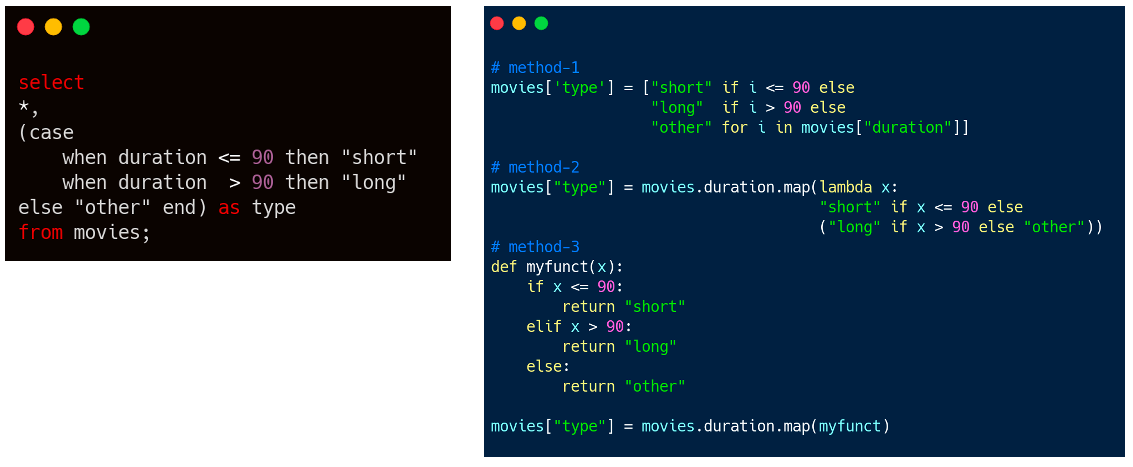
</div>

In [133]:
# method-1
movies_copy = movies.copy()
movies_copy['type'] = ["short" if i <= 90 else
                       "long"  if i > 90 else
                       "other" for i in movies_copy["duration"]]
display(movies_copy.groupby(["type"]).agg(["count", "min", "max"])["duration"]) # check

# method-2
movies_copy = movies.copy()
movies_copy["type"] = movies_copy.duration.map(lambda x: 
                                               "short" if x <= 90 else 
                                               ("long" if x > 90 else "other"))
display(movies_copy.groupby(["type"]).agg(["count", "min", "max"])["duration"]) # check

# method-3
movies_copy = movies.copy()
def myfunct(x):
    if x <= 90:
        return "short"
    elif x > 90:
        return "long"
    else:
        return "other"
    
movies_copy["type"] = movies_copy.duration.map(myfunct)
display(movies_copy.groupby(["type"]).agg(["count", "min", "max"])["duration"]) # check

,count,min,max
type,,,
long,5518,91,357
short,3068,45,90


,count,min,max
type,,,
long,5518,91,357
short,3068,45,90


,count,min,max
type,,,
long,5518,91,357
short,3068,45,90


<div>
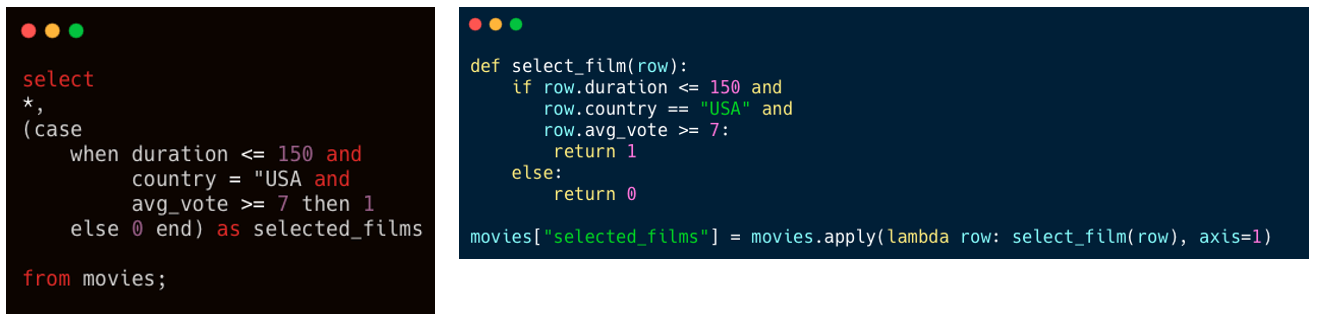
</div>

In [9]:
movies_copy = movies.copy()

def select_film(row):
    if row.duration <= 150 and row.country == "USA" and row.avg_vote >= 7:
        return 1
    else:
        return 0 
    
movies_copy["selected_films"] = movies_copy.apply(lambda row: select_film(row), axis=1)

# check
movies_copy[movies_copy.selected_films==1].pivot_table(values = ["imdb_title_id", "duration", "avg_vote"], 
                                                       index = ["selected_films", "country"], 
                                                       aggfunc = {"imdb_title_id": "count",
                                                                  'duration': ['min', 'max'], 
                                                                  'avg_vote': ['min', 'max']})

avg_vote      duration     imdb_title_id
                            max  min      max min         count
selected_films country                                         
1              USA          8.9  7.0      150  55           310

<div>
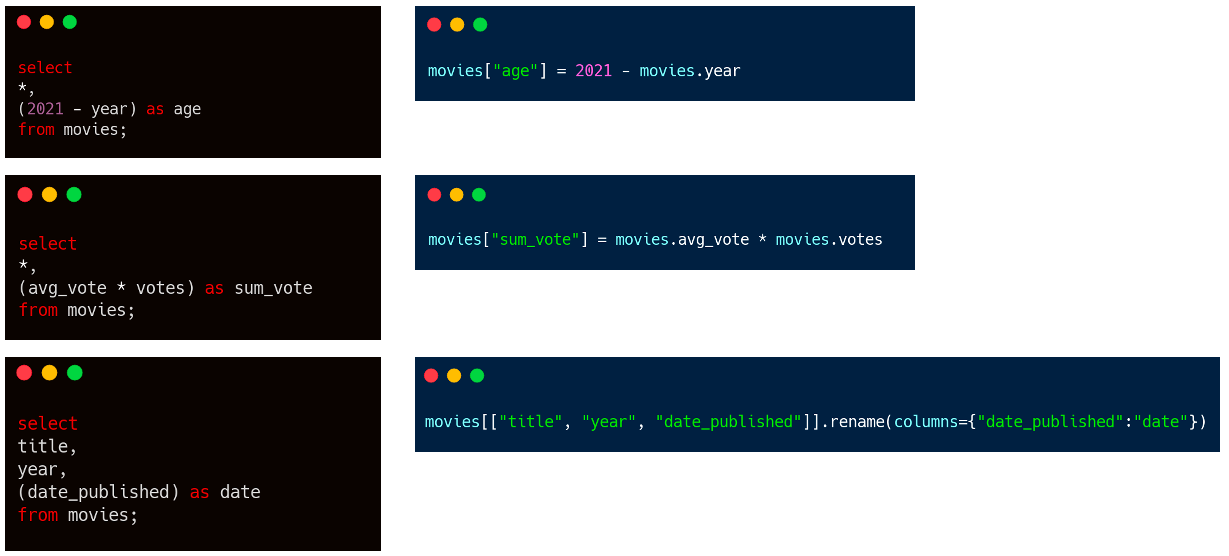
</div>

In [189]:
movies_copy = movies[movies["year"] != "TV Movie 2019"].reset_index()
movies_copy["age"] = 2021 - movies_copy.year.astype(int)
movies_copy.head(3)

,index,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,age
0,4683,tt0036711,Vacanze a Natale,Christmas Holiday,1944,1944-07-31,"Crime, Drama, Film-Noir",93,USA,English,...,A young femme fatale-type woman realizes that ...,6.6,1162,NaN,NaN,NaN,NaN,39.0,20.0,77
1,28176,tt0110216,Junior,Junior,1994,1994-12-22,"Comedy, Romance, Sci-Fi",109,USA,English,...,"As part of a fertility research project, a mal...",4.6,63996,$ 60000000,$ 36763355,$ 108431355,59.0,90.0,43.0,27
2,16686,tt0071914,Nitten røde roser,Nitten røde roser,1974,1974-08-16,Crime,99,Denmark,Danish,...,A Danish man's girlfriend is killed by a drunk...,6.4,178,DKK 1400000,NaN,NaN,NaN,2.0,2.0,47


In [193]:
movies_copy = movies.copy()
movies_copy["sum_vote"] = movies_copy.avg_vote * movies_copy.votes
movies_copy.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,sum_vote
4683,tt0036711,Vacanze a Natale,Christmas Holiday,1944,1944-07-31,"Crime, Drama, Film-Noir",93,USA,English,Robert Siodmak,...,A young femme fatale-type woman realizes that ...,6.6,1162,NaN,NaN,NaN,NaN,39.0,20.0,7669.2
28176,tt0110216,Junior,Junior,1994,1994-12-22,"Comedy, Romance, Sci-Fi",109,USA,English,Ivan Reitman,...,"As part of a fertility research project, a mal...",4.6,63996,$ 60000000,$ 36763355,$ 108431355,59.0,90.0,43.0,294381.6
16686,tt0071914,Nitten røde roser,Nitten røde roser,1974,1974-08-16,Crime,99,Denmark,Danish,Esben Høilund Carlsen,...,A Danish man's girlfriend is killed by a drunk...,6.4,178,DKK 1400000,NaN,NaN,NaN,2.0,2.0,1139.2


In [3]:
movies[["title", "year", "date_published"]].rename(columns={"date_published":"date"})

,title,year,date
4683,Vacanze a Natale,1944,1944-07-31
28176,Junior,1994,1994-12-22
16686,Nitten røde roser,1974,1974-08-16
76981,Rosso Mille Miglia,2015,2015-10-15
79161,4/20 Massacre,2018,2018-04-03
...,...,...,...
17331,Centro della Terra: continente sconosciuto,1976,1976-07-01
84400,Systemsprenger,2019,2019-12-12
60875,Madison County,2011,2011-10-17
34080,Siete mil días juntos,1994,1995-01-27


## where

<a id='and'></a>

### X and Y

<div>
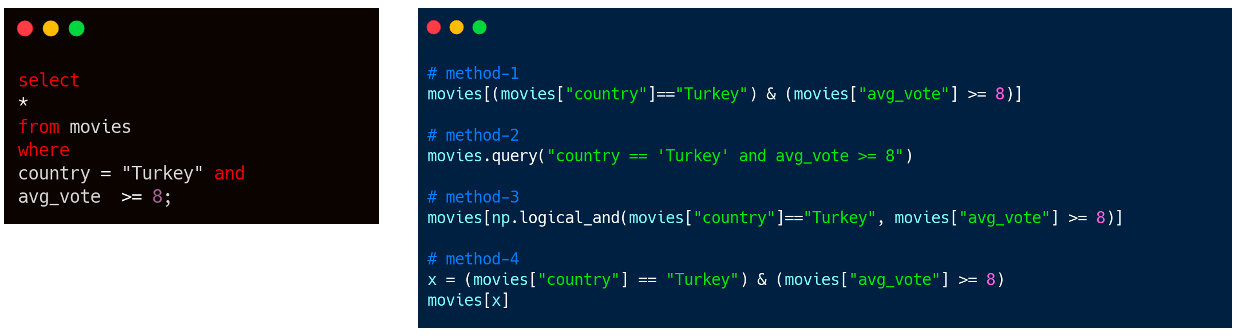
</div>

In [255]:
movies[(movies["country"]=="Turkey") & (movies["avg_vote"] >= 8)]

# alternative
# movies.query("country == 'Turkey' and avg_vote >= 8")

# alternative
# movies[np.logical_and(movies["country"]=="Turkey", movies["avg_vote"] >= 8)]

# alternative
# x = (movies["country"] == "Turkey") & (movies["avg_vote"] >= 8)
# movies[x]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
78754,tt5813916,Montagna II,Dag II,2016,2016-11-04,"Action, Drama, War",135,Turkey,Turkish,Alper Caglar,...,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",In a desolate war zone where screams of the in...,8.8,103949,TRL 2000000,NaN,$ 11378898,NaN,145.0,3.0
85163,tt9124428,Bold Pilot - Leggenda di un campione,Bizim Için Sampiyon,2018,2018-12-07,"Biography, Drama, Romance",130,Turkey,Turkish,Ahmet Katiksiz,...,"Ekin Koç, Farah Zeynep Abdullah, Fikret Kuskan...",A true love and success story from the 1990s T...,8.3,8818,NaN,NaN,$ 6214362,NaN,28.0,13.0
38393,tt0252361,Davaro: Son Eskiya,Davaro: Son Eskiya,1981,1981,"Adventure, Comedy, Drama",94,Turkey,Turkish,Kartal Tibet,...,"Kemal Sunal, Sener Sen, Pembe Mutlu, Aysen Gru...",Memo returns from Germany to get married with ...,8.1,8112,NaN,NaN,NaN,NaN,NaN,NaN
38407,tt0252488,Hababam Sinifi Sinifta Kaldi,Hababam Sinifi Sinifta Kaldi,1976,1976-01-01,Comedy,91,Turkey,Turkish,Ertem Egilmez,...,"Kemal Sunal, Münir Özkul, Semra Özdamar, Adile...",A young and beautiful female teacher starts wo...,9.0,21178,NaN,NaN,NaN,NaN,4.0,1.0
38999,tt0263975,Selvi Boylum Al Yazmalim,Selvi Boylum Al Yazmalim,1977,1978-11-01,"Drama, Romance",90,Turkey,Turkish,Atif Yilmaz,...,"Türkan Soray, Kadir Inanir, Ahmet Mekin, Hülya...",Story of a dilemma between a woman's love and ...,8.6,14422,NaN,NaN,$ 45123,NaN,10.0,2.0


<a id='or'></a>

### X or Y

<div>
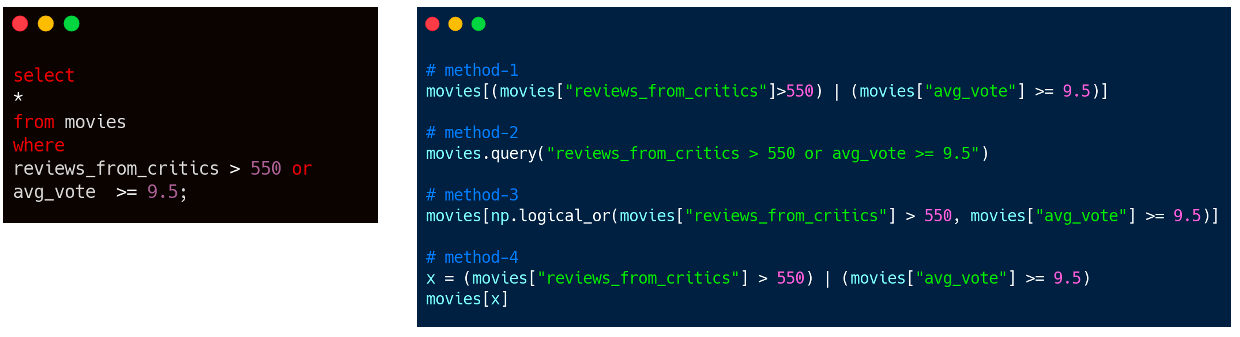
</div>

In [258]:
movies[(movies["reviews_from_critics"]>550) | (movies["avg_vote"] >= 9.5)]
# alternative
# movies.query("reviews_from_critics > 550 or avg_vote >= 9.5")

# alternative
# movies[np.logical_or(movies["reviews_from_critics"] > 550, movies["avg_vote"] >= 9.5)]

# alternative
# x = (movies["reviews_from_critics"] > 550) | (movies["avg_vote"] >= 9.5)
# movies[x]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
81897,tt7131622,C'era una volta a... Hollywood,Once Upon a Time... in Hollywood,2019,2019-09-18,"Comedy, Drama",161,"USA, UK, China","English, Italian, Spanish, German",Quentin Tarantino,...,"Leonardo DiCaprio, Brad Pitt, Margot Robbie, E...",A faded television actor and his stunt double ...,7.6,507214,$ 90000000,$ 142502728,$ 374343626,83.0,5166.0,613.0
47448,tt0454876,Vita di Pi,Life of Pi,2012,2012-12-20,"Adventure, Drama, Fantasy",127,"USA, Taiwan, UK, Canada","Arabic, English, Tamil, French, Japanese, Hind...",Ang Lee,...,"Suraj Sharma, Irrfan Khan, Ayush Tandon, Gauta...",A young man who survives a disaster at sea is ...,7.9,570273,$ 120000000,$ 124987023,$ 609016565,79.0,922.0,567.0
62660,tt1853728,Django Unchained,Django Unchained,2012,2013-01-17,"Drama, Western",165,USA,"English, German, French, Italian",Quentin Tarantino,...,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...","With the help of a German bounty hunter, a fre...",8.4,1317856,$ 100000000,$ 162805434,$ 425368238,81.0,1547.0,838.0
84434,tt8571428,Vaarthakal Ithuvare,Vaarthakal Ithuvare,2019,2019-11-22,Comedy,121,India,Malayalam,Manoj Nair,...,"Siju Wilson, Nandu, Vinay Forrt, Mammukoya, Al...","Ittan Pillai, the police station head finds hi...",9.7,473,NaN,NaN,NaN,NaN,20.0,NaN
56329,tt12747588,Meka Suri,Meka Suri,2020,2020-07-31,"Crime, Thriller",86,India,Telugu,Trinadh Velisila,...,"Abhinay, Naresh Byreddy, Sharat Kumar, Sravan,...","The story revolves around Meka Suri, a butcher...",9.7,1126,NaN,NaN,NaN,NaN,502.0,NaN
76459,tt5013056,Dunkirk,Dunkirk,2017,2017-08-31,"Action, Drama, History",106,"UK, Netherlands, France, USA","English, French, German",Christopher Nolan,...,"Fionn Whitehead, Damien Bonnard, Aneurin Barna...","Allied soldiers from Belgium, the British Empi...",7.9,531422,$ 100000000,$ 189740665,$ 526949403,94.0,2399.0,624.0
64523,tt2096673,Inside Out,Inside Out,2015,2015-09-16,"Animation, Adventure, Comedy",95,USA,English,"Pete Docter, Ronnie Del Carmen",...,"Amy Poehler, Phyllis Smith, Richard Kind, Bill...",After young Riley is uprooted from her Midwest...,8.1,592575,$ 175000000,$ 356921711,$ 858071350,94.0,1034.0,589.0


<a id='group_filter'></a>

### X or (Y and Z)

<div>
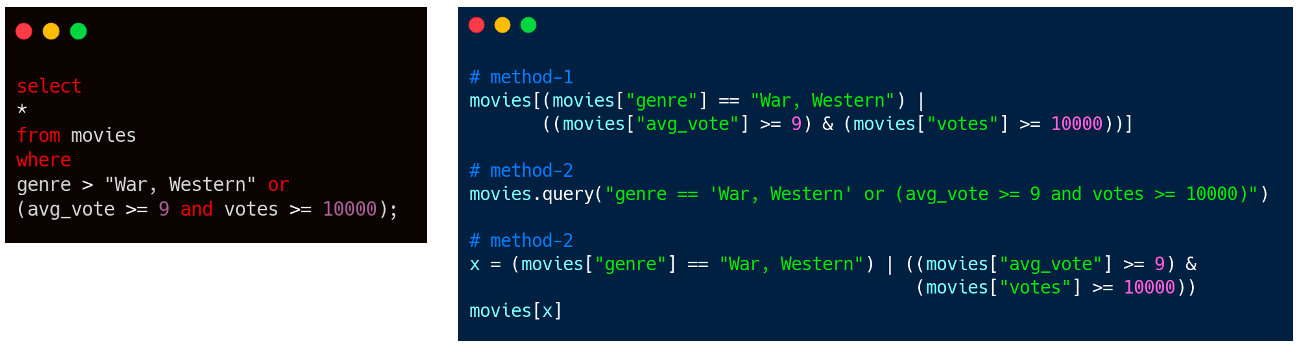
</div>

In [268]:
movies[(movies["genre"] == "War, Western") | ((movies["avg_vote"] >= 9) & (movies["votes"] >= 10000))]

# alternative
# movies.query("genre == 'War, Western' or (avg_vote >= 9 and votes >= 10000)")

# alternative
# x = (movies["genre"] == "War, Western") | ((movies["avg_vote"] >= 9) & (movies["votes"] >= 10000))
# movies[x]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
8504,tt0048600,La rivolta dei seminole,Seminole Uprising,1955,1955-05-01,"War, Western",74,USA,English,Earl Bellamy,...,"George Montgomery, Karin Booth, William Fawcet...",Cavalry Lieutenant Can Elliott is ordered to b...,5.2,167,NaN,NaN,NaN,NaN,12.0,3.0
38407,tt0252488,Hababam Sinifi Sinifta Kaldi,Hababam Sinifi Sinifta Kaldi,1976,1976-01-01,Comedy,91,Turkey,Turkish,Ertem Egilmez,...,"Kemal Sunal, Münir Özkul, Semra Özdamar, Adile...",A young and beautiful female teacher starts wo...,9.0,21178,NaN,NaN,NaN,NaN,4.0,1.0


<a id='function_filter'></a>

### function in filter

<div>
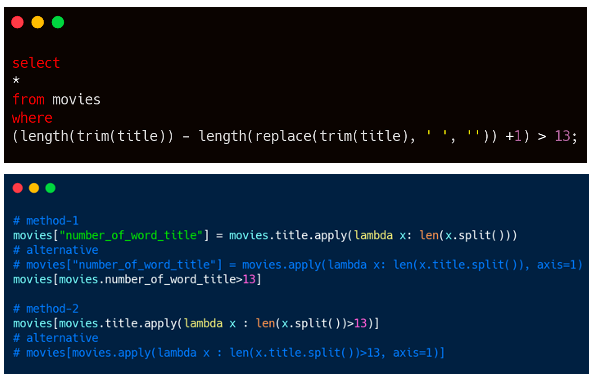
</div>

In [94]:
# method-1
movies["number_of_word_title"] = movies.title.apply(lambda x: len(x.split()))
# alternative
# movies["number_of_word_title"] = movies.apply(lambda x: len(x.title.split()), axis=1)
movies[movies.number_of_word_title>13]

# method-2
movies[movies.title.apply(lambda x : len(x.split())>13)]
# alternative
# movies[movies.apply(lambda x : len(x.title.split())>13, axis=1)]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,number_of_word_title
63382,tt1948581,Karei naru erogami-ke no ichizoku: Shinsô reij...,Karei naru erogami-ke no ichizoku: Shinsô reij...,2011,2011-05-27,Sci-Fi,72,Japan,Japanese,Naoyuki Tomomatsu,...,A Rich Heiress Receive a Third Butlerdroid for...,3.5,259,NaN,NaN,NaN,NaN,1.0,14.0,15
18436,tt0077548,La fine del mondo nel nostro solito letto in u...,La fine del mondo nel nostro solito letto in u...,1978,1978-01-17,"Drama, Romance",104,"Italy, Canada","Italian, English",Lina Wertmüller,...,A communist journalist and an American liberal...,6.2,228,NaN,NaN,NaN,NaN,3.0,5.0,14
15082,tt0067443,Morgen fällt die Schule aus - Die Lümmel von d...,Morgen fällt die Schule aus - Die Lümmel von d...,1971,1972-01-03,Comedy,90,West Germany,"German, Dutch",Werner Jacobs,...,"Pepe Nietnagel's father, a stamp dealer, is st...",5.2,303,NaN,NaN,NaN,NaN,2.0,4.0,14
76351,tt4974616,"Torna a casa, Jimi! - 10 cose da non fare quan...",Smuggling Hendrix,2018,2019-04-18,"Comedy, Drama",92,Cyprus,"Greek, English, Turkish",Marios Piperides,...,"Yiannis, a faded musician who is about to leav...",6.6,746,NaN,NaN,$ 226749,NaN,3.0,22.0,17
35298,tt0186988,Elvis Is Alive! I Swear I Saw Him Eating Ding ...,Elvis Is Alive! I Swear I Saw Him Eating Ding ...,1998,1998,Comedy,90,USA,English,Robert Diaz Leroy,...,NaN,2.7,121,$ 1000000,NaN,NaN,NaN,6.0,2.0,15
67221,tt2417650,30 Nights of Paranormal Activity with the Devi...,30 Nights of Paranormal Activity with the Devi...,2013,2013-02-04,Comedy,80,USA,English,Craig Moss,...,"After a stint in a psychiatric hospital, a you...",2.5,3491,$ 3000000,NaN,NaN,NaN,19.0,28.0,15
13600,tt0063254,Die Lümmel von der ersten Bank - 1. Trimester:...,Die Lümmel von der ersten Bank - 1. Trimester:...,1968,1974-08-23,Comedy,85,West Germany,German,Werner Jacobs,...,Collectable stamps trader Kurt Nietnagel's son...,5.7,651,NaN,NaN,NaN,NaN,2.0,8.0,14


## sorting

<div>
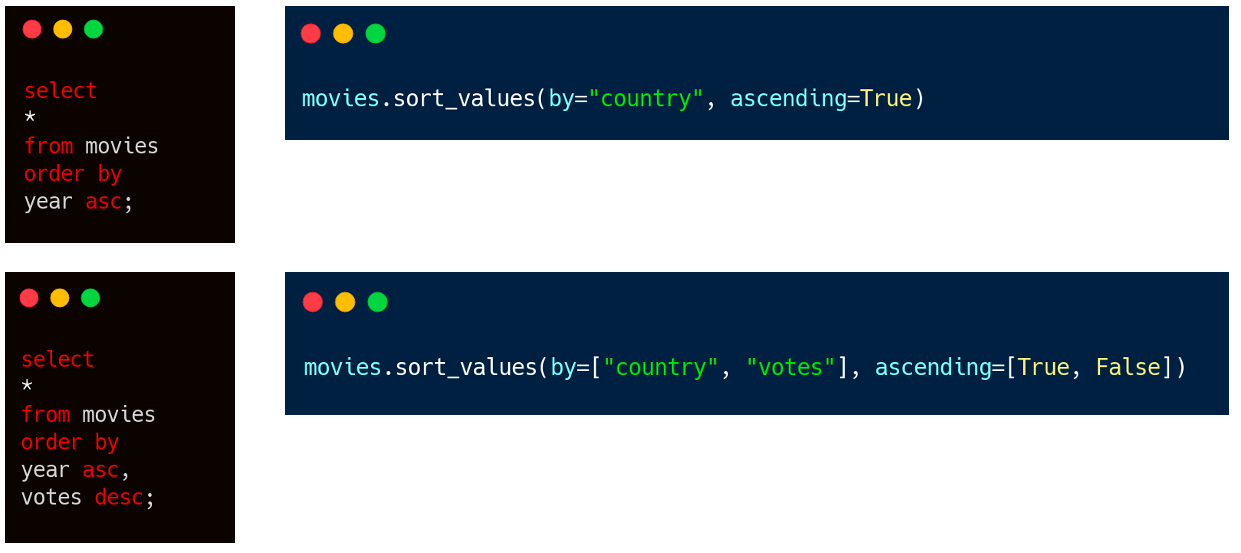
</div>

In [286]:
movies.sort_values(by="country", ascending=True)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
77692,tt5453036,Drejt Fundit,Drejt Fundit,2015,2015-10-22,Action,120,Albania,Albanian,Drilon Hoxha,...,"Drilon Hoxha, Erand Hoxha, Ardian Ramushi, Ard...",It's first action movie in Albania,4.3,237,EUR 85000,NaN,NaN,NaN,4.0,NaN
52376,tt10102350,2 Gisht Mjaltë,2 Gisht Mjaltë,2019,2019-03-28,Comedy,101,Albania,Albanian,Emir Khalilzadeh,...,"Margent Caushi, Bujar Asqeriu, Vin Bejleri, Ko...",The story of a couple trying to realize a hone...,3.2,561,EUR 250000,NaN,NaN,NaN,19.0,2.0
58911,tt1517148,Gjallë,Gjallë,2009,2009-07-05,Drama,90,"Albania, Austria, France",Albanian,Artan Minarolli,...,"Nik Xhelilaj, Xhevdet Ferri, Bruno Shllaku, Ni...",In a country where tradition is constantly at ...,6.4,174,NaN,NaN,$ 5688,NaN,NaN,6.0
68741,tt2814514,Bota Café,Bota,2014,2015-06-25,Drama,104,"Albania, Italy, Kosovo",Albanian,"Iris Elezi, Thomas Logoreci",...,"Flonja Kodheli, Artur Gorishti, Fioralba Kryem...",One week at the Bota café. Nothing happens. Ev...,6.8,157,NaN,NaN,NaN,NaN,1.0,9.0
81339,tt6852206,Carnaval fi Dachra,Carnaval fi Dachra,1994,1994,Comedy,120,Algeria,Arabic,Mohamed Oukassi,...,"Athmane Ariout, Salah Aougrout, Lakhder Boukhe...","Makhlouf Bombardier, decides to be elected may...",7.6,178,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69945,tt3124676,Little Rascals: Best of Our Gang,Little Rascals: Best of Our Gang,1930,2008-07-01,Comedy,84,NaN,NaN,NaN,...,"Eugene 'Porky' Lee, George 'Spanky' McFarland,...","Spanky, Buckwheat, Porky and all The Little Ra...",7.2,132,NaN,NaN,NaN,NaN,1.0,NaN
62832,tt1870543,Cruel Will,Cruel Will,2014,2014-01-03,"Horror, Thriller",90,NaN,English,Arthur Romeo,...,"Arron Kinser, Marissa Pistone, Spencer Garrett...","Tragedy strikes married couple Paul and Lily, ...",3.5,361,$ 80000,NaN,NaN,NaN,9.0,2.0
53228,tt10582422,Sweet Sunshine,Sweet Sunshine,2020,2020-03-20,Drama,93,NaN,English,Craig McMahon,...,"John Way, Mackenzie Coffman, Bill Wetherill, R...",After his rise to fame causes a rift with his ...,7.0,216,NaN,NaN,NaN,NaN,86.0,1.0
59908,tt1604560,Clinton Road,Clinton Road,2019,2019-06-14,Horror,77,NaN,English,"Richard Grieco, Steve Stanulis",...,"Ace Young, Erin O'Brien, Cody Calafiore, Katie...",A widowed firefighter seeks closure after his ...,5.4,828,$ 2500000,$ 50400,$ 50400,NaN,44.0,16.0


In [288]:
movies.sort_values(by=["country", "votes"], ascending=[True, False])

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
52376,tt10102350,2 Gisht Mjaltë,2 Gisht Mjaltë,2019,2019-03-28,Comedy,101,Albania,Albanian,Emir Khalilzadeh,...,"Margent Caushi, Bujar Asqeriu, Vin Bejleri, Ko...",The story of a couple trying to realize a hone...,3.2,561,EUR 250000,NaN,NaN,NaN,19.0,2.0
77692,tt5453036,Drejt Fundit,Drejt Fundit,2015,2015-10-22,Action,120,Albania,Albanian,Drilon Hoxha,...,"Drilon Hoxha, Erand Hoxha, Ardian Ramushi, Ard...",It's first action movie in Albania,4.3,237,EUR 85000,NaN,NaN,NaN,4.0,NaN
58911,tt1517148,Gjallë,Gjallë,2009,2009-07-05,Drama,90,"Albania, Austria, France",Albanian,Artan Minarolli,...,"Nik Xhelilaj, Xhevdet Ferri, Bruno Shllaku, Ni...",In a country where tradition is constantly at ...,6.4,174,NaN,NaN,$ 5688,NaN,NaN,6.0
68741,tt2814514,Bota Café,Bota,2014,2015-06-25,Drama,104,"Albania, Italy, Kosovo",Albanian,"Iris Elezi, Thomas Logoreci",...,"Flonja Kodheli, Artur Gorishti, Fioralba Kryem...",One week at the Bota café. Nothing happens. Ev...,6.8,157,NaN,NaN,NaN,NaN,1.0,9.0
81339,tt6852206,Carnaval fi Dachra,Carnaval fi Dachra,1994,1994,Comedy,120,Algeria,Arabic,Mohamed Oukassi,...,"Athmane Ariout, Salah Aougrout, Lakhder Boukhe...","Makhlouf Bombardier, decides to be elected may...",7.6,178,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74294,tt4297380,Theresa & Allison,Theresa & Allison,2019,2019-10-15,"Drama, Fantasy, Horror",120,NaN,English,Jeremiah Kipp,...,"Arielle Hope, Sarah Schoofs, Alyson Danielczuk...","After a one night stand turns disastrous, Ther...",5.9,741,NaN,NaN,NaN,NaN,17.0,5.0
62832,tt1870543,Cruel Will,Cruel Will,2014,2014-01-03,"Horror, Thriller",90,NaN,English,Arthur Romeo,...,"Arron Kinser, Marissa Pistone, Spencer Garrett...","Tragedy strikes married couple Paul and Lily, ...",3.5,361,$ 80000,NaN,NaN,NaN,9.0,2.0
53228,tt10582422,Sweet Sunshine,Sweet Sunshine,2020,2020-03-20,Drama,93,NaN,English,Craig McMahon,...,"John Way, Mackenzie Coffman, Bill Wetherill, R...",After his rise to fame causes a rift with his ...,7.0,216,NaN,NaN,NaN,NaN,86.0,1.0
73030,tt3888806,Love Is Not Enough,Love Is Not Enough,2019,2019-06-06,Comedy,97,NaN,NaN,Shawn Woodard,...,"Lavell Crawford, Kim Coles, Claudia Jordan, Ja...",The love and lives of recent college graduates...,6.6,141,NaN,NaN,NaN,NaN,81.0,NaN


## aggregate

In [6]:
movies = movies[movies["year"] != "TV Movie 2019"]
movies["year"] = movies.year.astype(int)

<div>
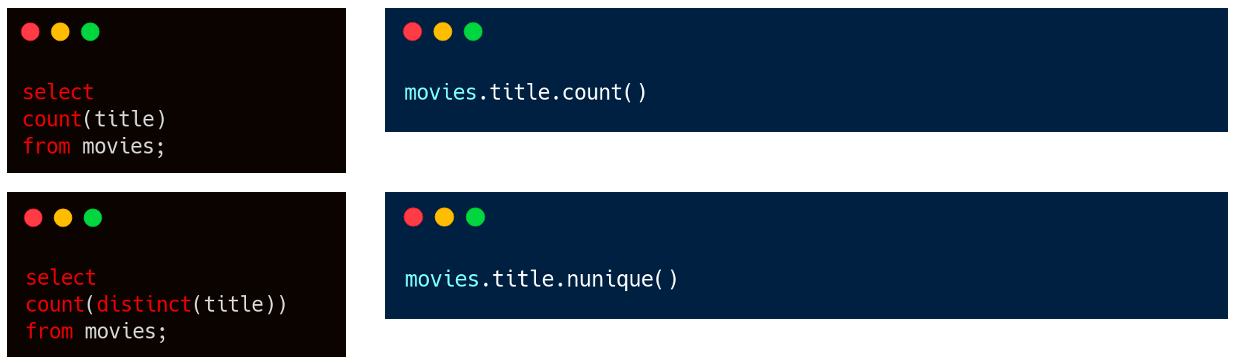
</div>

In [5]:
movies.title.count()

8585

In [6]:
movies.title.nunique()

8546

<div>
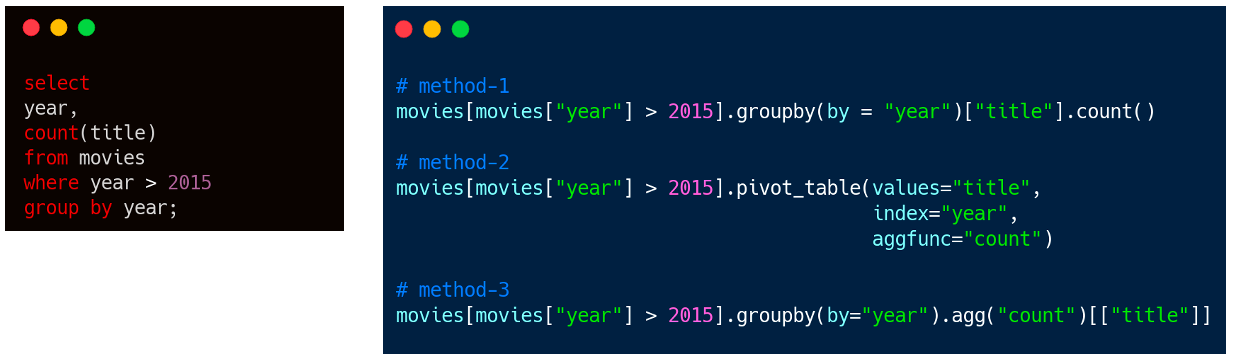
</div>

In [8]:
display( movies[movies["year"] > 2015].groupby(by = "year")["title"].count().to_frame() )

display( movies[movies["year"] > 2015].pivot_table(values="title", index="year", aggfunc="count") )

display( movies[movies["year"] > 2015].groupby(by="year").agg(["count"])[["title"]] )

# couunt distinct
display(movies[movies["year"] > 2015].pivot_table(values="title", index="year", aggfunc=lambda x: len(x.unique())))

,title
year,
2016,296
2017,317
2018,322
2019,287
2020,77


,title
year,
2016,296
2017,317
2018,322
2019,287
2020,77


,title
,count
year,
2016,296
2017,317
2018,322
2019,287
2020,77


<div>
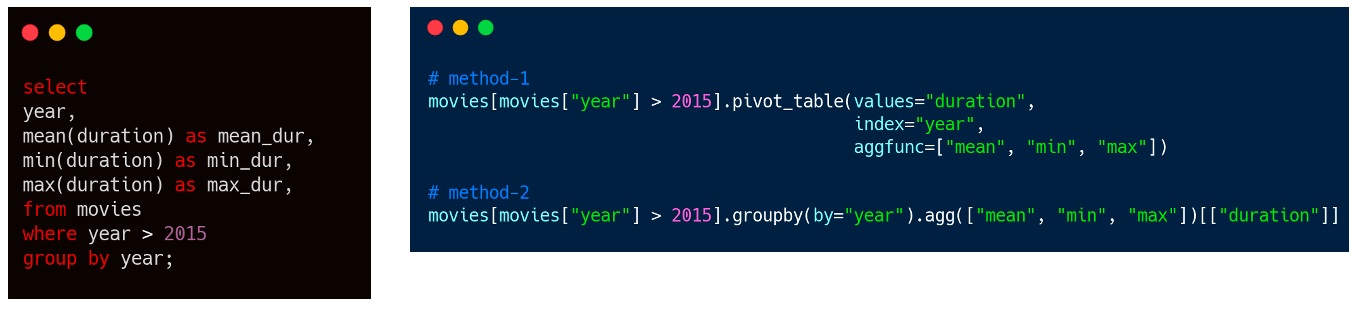
</div>

In [22]:
display( movies[movies["year"] > 2015].pivot_table(values="duration", 
                                                   index="year", 
                                                   aggfunc=["mean", "min", "max"]) )

display( movies[movies["year"] > 2015].groupby(by="year").agg(["mean", "min", "max"])[["duration"]] )

,mean,min,max
,duration,duration,duration
year,,,
2016,102.466216,53,173
2017,102.104101,47,185
2018,104.307453,63,234
2019,105.229965,50,174
2020,101.493506,60,177


duration         
            mean min  max
year                     
2016  102.466216  53  173
2017  102.104101  47  185
2018  104.307453  63  234
2019  105.229965  50  174
2020  101.493506  60  177

<div>
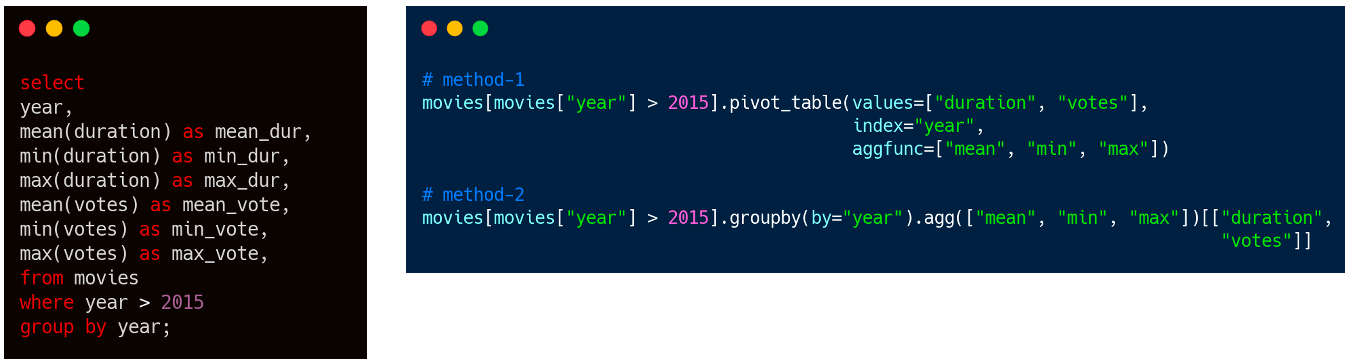
</div>

In [15]:
a = movies[movies["year"] > 2015].pivot_table(values=["duration", "votes"], 
                                              index="year", 
                                              aggfunc=["mean", "min", "max"])
display(a)
# for change columns level
# display(a.swaplevel(axis=1).sort_index(axis=1))

display( movies[movies["year"] > 2015].groupby(by="year").agg(["mean", "min", "max"])[["duration", "votes"]] )

mean                    min            max        
        duration         votes duration votes duration   votes
year                                                          
2016  102.466216  10111.402027       53   102      173  418336
2017  102.104101   7012.649842       47   101      185  531422
2018  104.307453   4910.903727       63   100      234  433549
2019  105.229965   7223.749129       50   101      174  507214
2020  101.493506   2561.454545       60   100      177   45177

duration                  votes             
            mean min  max          mean  min     max
year                                                
2016  102.466216  53  173  10111.402027  102  418336
2017  102.104101  47  185   7012.649842  101  531422
2018  104.307453  63  234   4910.903727  100  433549
2019  105.229965  50  174   7223.749129  101  507214
2020  101.493506  60  177   2561.454545  100   45177

<div>
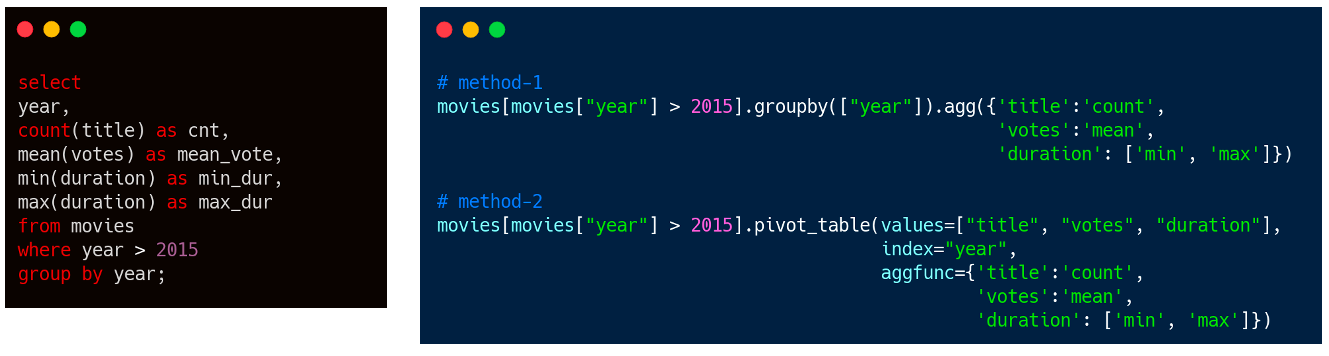
</div>

In [25]:
display( movies[movies["year"] > 2015].groupby(["year"]).agg({'title':'count', 
                                                              'votes':'mean', 
                                                              'duration': ['min', 'max']}) )

display( movies[movies["year"] > 2015].pivot_table(values=["title", "votes", "duration"], 
                                                   index="year", 
                                                   aggfunc={'title':'count', 
                                                            'votes':'mean', 
                                                            'duration': ['min', 'max']}) )

title         votes duration     
     count          mean      min  max
year                                  
2016   296  10111.402027       53  173
2017   317   7012.649842       47  185
2018   322   4910.903727       63  234
2019   287   7223.749129       50  174
2020    77   2561.454545       60  177

duration     title         votes
          max min count          mean
year                                 
2016      173  53   296  10111.402027
2017      185  47   317   7012.649842
2018      234  63   322   4910.903727
2019      174  50   287   7223.749129
2020      177  60    77   2561.454545

<div>
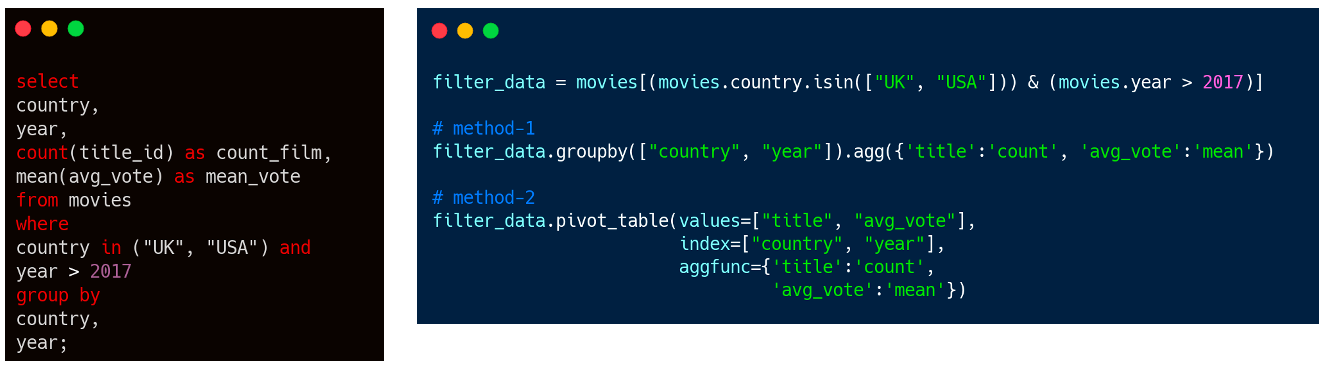
</div>

In [40]:
filter_data = movies[(movies.country.isin(["UK", "USA"])) & (movies.year > 2017)]

display( filter_data.groupby(["country", "year"]).agg({'title':'count', 
                                                       'avg_vote':'mean'}) )

display( filter_data.pivot_table(values=["title", "avg_vote"], 
                                 index=["country", "year"], 
                                 aggfunc={'title':'count', 
                                          'avg_vote':'mean'}) )

title  avg_vote
country year                 
UK      2018     23  5.065217
        2019     15  4.833333
        2020      6  4.066667
USA     2018     68  4.800000
        2019     63  4.939683
        2020     26  4.665385

avg_vote  title
country year                 
UK      2018  5.065217     23
        2019  4.833333     15
        2020  4.066667      6
USA     2018  4.800000     68
        2019  4.939683     63
        2020  4.665385     26

### example

In [51]:
filter_data = movies[(movies.country.isin(["UK", "USA"])) & 
                     (movies.year > 2017) & 
                     (movies.genre.isin(["Comedy", "Horror", "Drama"]))]

display( filter_data.pivot_table(values=["title", "avg_vote"],
                                 columns=["genre"],
                                 index=["country", "year"], 
                                 aggfunc={'title':'count', 
                                          'avg_vote':'mean'}) )

avg_vote                      title             
genre          Comedy     Drama    Horror Comedy Drama Horror
country year                                                 
UK      2018     4.90  7.800000  3.166667    1.0   1.0    3.0
        2019     4.85  5.800000  3.733333    2.0   2.0    3.0
        2020      NaN  5.300000  2.700000    NaN   1.0    1.0
USA     2018     4.80  5.400000  4.028571    3.0   5.0    7.0
        2019     3.85  6.227273  4.000000    4.0  11.0    2.0
        2020     5.50  5.800000  3.660000    2.0   1.0    5.0

<a id='filter_in_subquery'></a>

<div>
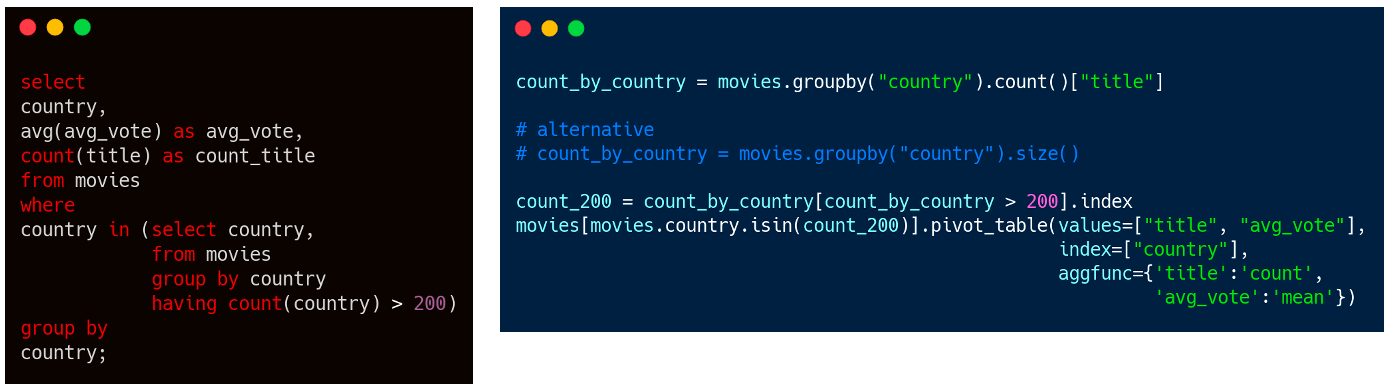
</div>

In [4]:
count_by_country = movies.groupby("country").count()["title"]
# count_by_country = movies.groupby("country").size()

count_200 = count_by_country[count_by_country > 200].index
movies[movies.country.isin(count_200)].pivot_table(values=["title", "avg_vote"], 
                                                   index=["country"], 
                                                   aggfunc={'title':'count', 'avg_vote':'mean'})

,avg_vote,title
country,,
France,6.138636,308
India,6.251639,610
Italy,5.809836,244
Japan,6.535127,316
UK,5.792326,430
USA,5.529042,2851


### example

In [13]:
filter_data = movies[(movies.year > 2010) & 
                     (movies.genre.isin(["Comedy", "Horror", "Drama"]))]

result = filter_data.pivot_table("title", ["country", "genre"], aggfunc="count").rename(columns={"title":"film_cnt"})
result = result.sort_values(by=["genre", "film_cnt"], ascending=[True, False]).reset_index()
result.set_index(result.groupby('genre').cumcount()+1, inplace=True)
result = result.pivot(columns="genre").iloc[:10]
result.columns = result.columns.swaplevel(0, 1)
result.sort_index(axis=1, level=0, inplace=True)
result

genre           Comedy                 Drama              Horror         
               country film_cnt      country film_cnt    country film_cnt
1                  USA     53.0          USA     72.0        USA     49.0
2                Italy     27.0        India     36.0         UK     13.0
3               France     23.0       France     16.0      Japan      4.0
4                India     18.0  South Korea     14.0  Australia      3.0
5               Russia     14.0           UK     12.0     Canada      3.0
6               Turkey     13.0         Iran     10.0      India      3.0
7      France, Belgium      8.0        Japan     10.0     Russia      3.0
8                   UK      8.0       Brazil      9.0     Turkey      3.0
9                Spain      7.0      Germany      9.0      China      2.0
10              Brazil      6.0        Italy      9.0    Germany      2.0

In [ ]:
# pivot table func may return multi-index dataframe. it could be used, if necessary:
# result = movies.pivot_table(...)
# result.columns = ["x", "y", ...]
# result.columns = ["_".join(col) for col in result.columns]
# result.reset_index()

<a id='join'></a>

## join

In [179]:
df1 = movies[["imdb_title_id", "title", "year", "genre", "duration"]].iloc[:5, :]
df2 = ratings[["imdb_title_id", 
               "median_vote", 
               "males_allages_avg_vote", 
               "females_allages_avg_vote"]].rename(columns={"imdb_title_id":"id",
                                                            "males_allages_avg_vote":"male_vote",
                                                            "females_allages_avg_vote":"female_vote"}).iloc[:5, :]
display(df1, df2)

,imdb_title_id,title,year,genre,duration
4683,tt0036711,Vacanze a Natale,1944,"Crime, Drama, Film-Noir",93
28176,tt0110216,Junior,1994,"Comedy, Romance, Sci-Fi",109
16686,tt0071914,Nitten røde roser,1974,Crime,99
76981,tt5178660,Rosso Mille Miglia,2015,Comedy,94
79161,tt5946668,4/20 Massacre,2018,"Action, Horror",84


,id,median_vote,male_vote,female_vote
4683,tt0036711,7.0,6.5,6.8
28176,tt0110216,5.0,4.6,4.9
16686,tt0071914,7.0,6.4,6.9
76981,tt5178660,5.0,4.6,5.1
79161,tt5946668,4.0,3.7,3.8


<a id='left_join'></a>

 ### left join

<div>
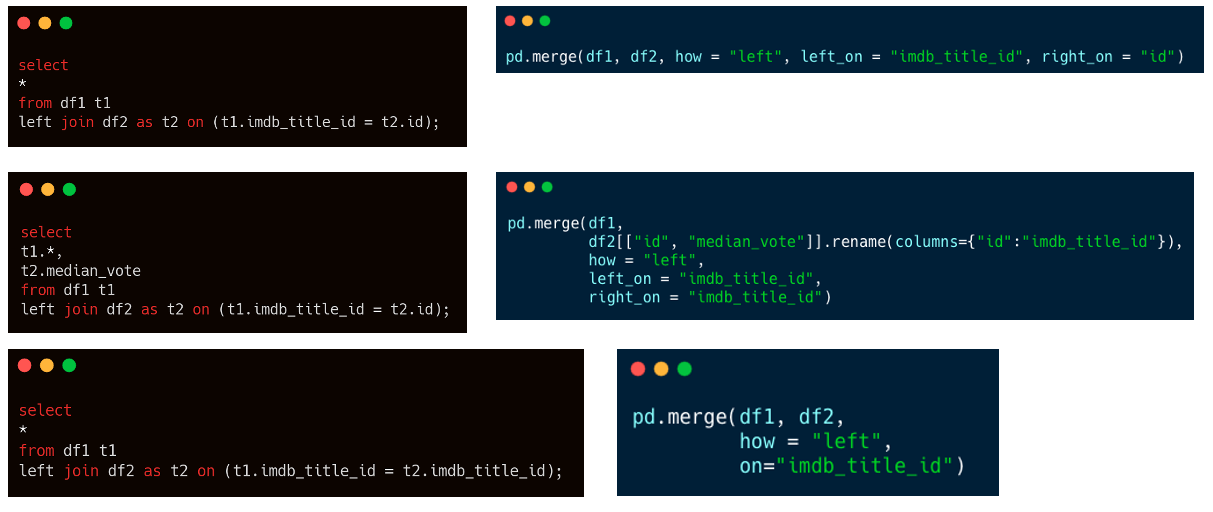
</div>

<div>
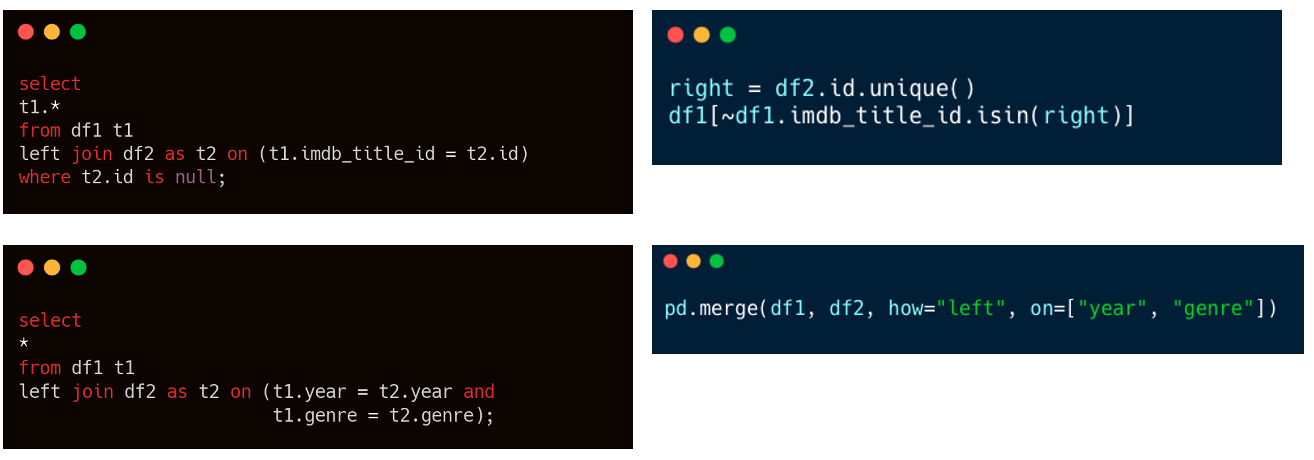
</div>

In [142]:
df3 = pd.merge(df1, df2, how = "left", left_on = "imdb_title_id", right_on = "id"); df3

,imdb_title_id,title,year,genre,duration,id,median_vote,male_vote,female_vote
0,tt0036711,Vacanze a Natale,1944,"Crime, Drama, Film-Noir",93,tt0036711,7.0,6.5,6.8
1,tt0110216,Junior,1994,"Comedy, Romance, Sci-Fi",109,tt0110216,5.0,4.6,4.9
2,tt0071914,Nitten røde roser,1974,Crime,99,tt0071914,7.0,6.4,6.9
3,tt5178660,Rosso Mille Miglia,2015,Comedy,94,tt5178660,5.0,4.6,5.1
4,tt5946668,4/20 Massacre,2018,"Action, Horror",84,tt5946668,4.0,3.7,3.8


In [146]:
pd.merge(df1, 
         df2[["id", "median_vote"]].rename(columns={"id":"imdb_title_id"}), 
         how = "left", 
         left_on = "imdb_title_id", 
         right_on = "imdb_title_id")

,imdb_title_id,title,year,genre,duration,median_vote
0,tt0036711,Vacanze a Natale,1944,"Crime, Drama, Film-Noir",93,7.0
1,tt0110216,Junior,1994,"Comedy, Romance, Sci-Fi",109,5.0
2,tt0071914,Nitten røde roser,1974,Crime,99,7.0
3,tt5178660,Rosso Mille Miglia,2015,Comedy,94,5.0
4,tt5946668,4/20 Massacre,2018,"Action, Horror",84,4.0


In [133]:
pd.merge(df1, df2, how = "left", left_on = "imdb_title_id", right_on = "id", left_index=True)

,imdb_title_id,title,year,genre,duration,id,median_vote,male_vote,female_vote
4683,tt0036711,Vacanze a Natale,1944,"Crime, Drama, Film-Noir",93,tt0036711,7.0,6.5,6.8
28176,tt0110216,Junior,1994,"Comedy, Romance, Sci-Fi",109,tt0110216,5.0,4.6,4.9
16686,tt0071914,Nitten røde roser,1974,Crime,99,tt0071914,7.0,6.4,6.9
76981,tt5178660,Rosso Mille Miglia,2015,Comedy,94,tt5178660,5.0,4.6,5.1
79161,tt5946668,4/20 Massacre,2018,"Action, Horror",84,tt5946668,4.0,3.7,3.8


In [134]:
pd.merge(df3, df2, how = "left", left_on = "imdb_title_id", right_on = "id", suffixes=("1", "2"))

,imdb_title_id,title,year,genre,duration,id1,median_vote1,male_vote1,female_vote1,id2,median_vote2,male_vote2,female_vote2
0,tt0036711,Vacanze a Natale,1944,"Crime, Drama, Film-Noir",93,tt0036711,7.0,6.5,6.8,tt0036711,7.0,6.5,6.8
1,tt0110216,Junior,1994,"Comedy, Romance, Sci-Fi",109,tt0110216,5.0,4.6,4.9,tt0110216,5.0,4.6,4.9
2,tt0071914,Nitten røde roser,1974,Crime,99,tt0071914,7.0,6.4,6.9,tt0071914,7.0,6.4,6.9
3,tt5178660,Rosso Mille Miglia,2015,Comedy,94,tt5178660,5.0,4.6,5.1,tt5178660,5.0,4.6,5.1
4,tt5946668,4/20 Massacre,2018,"Action, Horror",84,tt5946668,4.0,3.7,3.8,tt5946668,4.0,3.7,3.8


In [180]:
df1 = movies[["imdb_title_id", "title", "year", "genre", "duration"]].iloc[:5, :].reset_index(drop=True)
df2 = ratings[["imdb_title_id", 
               "median_vote", 
               "males_allages_avg_vote", 
               "females_allages_avg_vote"]].rename(columns={"males_allages_avg_vote":"male_vote",
                                                            "females_allages_avg_vote":"female_vote"}).iloc[:5, :]
display(df1, df2)

,imdb_title_id,title,year,genre,duration
0,tt0036711,Vacanze a Natale,1944,"Crime, Drama, Film-Noir",93
1,tt0110216,Junior,1994,"Comedy, Romance, Sci-Fi",109
2,tt0071914,Nitten røde roser,1974,Crime,99
3,tt5178660,Rosso Mille Miglia,2015,Comedy,94
4,tt5946668,4/20 Massacre,2018,"Action, Horror",84


,imdb_title_id,median_vote,male_vote,female_vote
4683,tt0036711,7.0,6.5,6.8
28176,tt0110216,5.0,4.6,4.9
16686,tt0071914,7.0,6.4,6.9
76981,tt5178660,5.0,4.6,5.1
79161,tt5946668,4.0,3.7,3.8


In [181]:
pd.merge(df1, df2, how = "left")

# method-2
# pd.merge(df1, df2, how = "left", on="imdb_title_id")

,imdb_title_id,title,year,genre,duration,median_vote,male_vote,female_vote
0,tt0036711,Vacanze a Natale,1944,"Crime, Drama, Film-Noir",93,7.0,6.5,6.8
1,tt0110216,Junior,1994,"Comedy, Romance, Sci-Fi",109,5.0,4.6,4.9
2,tt0071914,Nitten røde roser,1974,Crime,99,7.0,6.4,6.9
3,tt5178660,Rosso Mille Miglia,2015,Comedy,94,5.0,4.6,5.1
4,tt5946668,4/20 Massacre,2018,"Action, Horror",84,4.0,3.7,3.8


In [182]:
df1 = movies[["title", "year", "genre", "duration"]].iloc[:5, :]
df2 = ratings[["median_vote", 
               "males_allages_avg_vote", 
               "females_allages_avg_vote"]].rename(columns={"males_allages_avg_vote":"male_vote",
                                                            "females_allages_avg_vote":"female_vote"}).iloc[:5, :]
display(df1, df2)

,title,year,genre,duration
4683,Vacanze a Natale,1944,"Crime, Drama, Film-Noir",93
28176,Junior,1994,"Comedy, Romance, Sci-Fi",109
16686,Nitten røde roser,1974,Crime,99
76981,Rosso Mille Miglia,2015,Comedy,94
79161,4/20 Massacre,2018,"Action, Horror",84


,median_vote,male_vote,female_vote
4683,7.0,6.5,6.8
28176,5.0,4.6,4.9
16686,7.0,6.4,6.9
76981,5.0,4.6,5.1
79161,4.0,3.7,3.8


In [183]:
pd.merge(df1, df2, how = "left", left_index=True, right_index=True)

,title,year,genre,duration,median_vote,male_vote,female_vote
4683,Vacanze a Natale,1944,"Crime, Drama, Film-Noir",93,7.0,6.5,6.8
28176,Junior,1994,"Comedy, Romance, Sci-Fi",109,5.0,4.6,4.9
16686,Nitten røde roser,1974,Crime,99,7.0,6.4,6.9
76981,Rosso Mille Miglia,2015,Comedy,94,5.0,4.6,5.1
79161,4/20 Massacre,2018,"Action, Horror",84,4.0,3.7,3.8


In [184]:
df1 = movies[["imdb_title_id", "title", "year", "genre", "duration"]].iloc[857:860, :]
df2 = ratings[["imdb_title_id", "median_vote"]].rename(columns={"imdb_title_id":"id"}).iloc[857:860, :]
display(df1, df2)

,imdb_title_id,title,year,genre,duration
30501,tt0118903,Falling Sky,1998,Drama,95
69649,tt3059106,Satya 2,2013,"Action, Crime, Drama",142
80425,tt6381456,Fig Tree,2018,Drama,93


,id,median_vote
30501,tt0118903,6.0
69649,tt3059106,7.0


In [130]:
right = df2.id.unique()
df1[~df1.imdb_title_id.isin(right)]

,imdb_title_id,title,year,genre,duration
80425,tt6381456,Fig Tree,2018,Drama,93


In [185]:
df1 = movies[movies.index.isin([79808, 77692, 79390, 71415])][["year", "genre", "duration"]]
df2 = movies[movies.index.isin([71922, 74668, 75591])][["year", "genre", "language"]]

display(df1, df2)

,year,genre,duration
71415,2015,Drama,91
79390,2016,Action,153
79808,2015,Action,105
77692,2015,Action,120


,year,genre,language
71922,2015,Drama,"Afrikaans, English, Portuguese"
74668,2015,Action,English
75591,2015,"Comedy, Drama",Italian


In [187]:
pd.merge(df1, df2, how="left", on=["year", "genre"])

,year,genre,duration,language
0,2015,Drama,91,"Afrikaans, English, Portuguese"
1,2016,Action,153,NaN
2,2015,Action,105,English
3,2015,Action,120,English


<a id='inner_join'></a>

 ### inner join

<div>
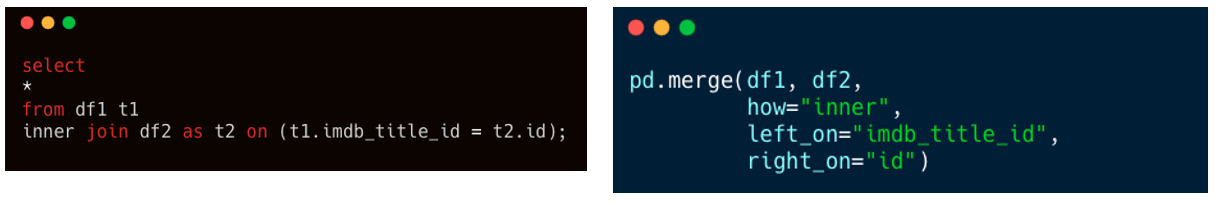
</div>

In [6]:
df1 = movies[["imdb_title_id", "title", "year", "genre", "duration"]].iloc[857:860, :]
df2 = ratings[["imdb_title_id", "median_vote"]].rename(columns={"imdb_title_id":"id"}).iloc[856:860, :]
display(df1, df2)

,imdb_title_id,title,year,genre,duration
30501,tt0118903,Falling Sky,1998,Drama,95
69649,tt3059106,Satya 2,2013,"Action, Crime, Drama",142
80425,tt6381456,Fig Tree,2018,Drama,93


,id,median_vote
29961,tt0117041,5.0
30501,tt0118903,6.0
69649,tt3059106,7.0


In [7]:
pd.merge(df1, df2, how="inner", left_on="imdb_title_id", right_on="id")

,imdb_title_id,title,year,genre,duration,id,median_vote
0,tt0118903,Falling Sky,1998,Drama,95,tt0118903,6.0
1,tt3059106,Satya 2,2013,"Action, Crime, Drama",142,tt3059106,7.0


<a id='append'></a>

 ### append

<div>
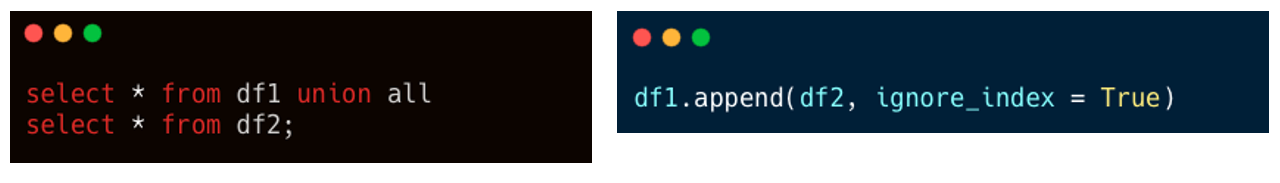
</div>

In [11]:
df1 = movies[["imdb_title_id", "title", "year", "genre", "duration"]].iloc[857:860, :]
df2 = movies[["imdb_title_id", "title", "year", "genre", "duration"]].iloc[82:84, :]
display(df1, df2)

,imdb_title_id,title,year,genre,duration
30501,tt0118903,Falling Sky,1998,Drama,95
69649,tt3059106,Satya 2,2013,"Action, Crime, Drama",142
80425,tt6381456,Fig Tree,2018,Drama,93


,imdb_title_id,title,year,genre,duration
50366,tt0822388,Home,2008,Drama,84
33551,tt0158587,Dhund,1973,"Drama, Mystery, Thriller",130


In [13]:
df1.append(df2, ignore_index = True)

,imdb_title_id,title,year,genre,duration
0,tt0118903,Falling Sky,1998,Drama,95
1,tt3059106,Satya 2,2013,"Action, Crime, Drama",142
2,tt6381456,Fig Tree,2018,Drama,93
3,tt0822388,Home,2008,Drama,84
4,tt0158587,Dhund,1973,"Drama, Mystery, Thriller",130
